# Images

References:

* [DataCamp's Image Processing in Python](https://campus.datacamp.com/courses/image-processing-in-python/)

In [676]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import skimage
from skimage import io, data, color, morphology
import numpy as np

## Loading an image with matplotlib

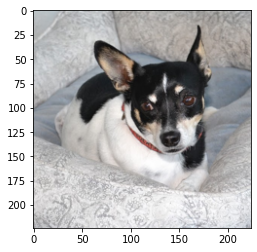

In [677]:
img = plt.imread("data/sola.png")
plt.imshow(img)
plt.show()

In [678]:
# (height, width, depth)
# meaning it's a 224x223 RGB image
img.shape

(224, 224, 3)

matplotlib represents colors as fractions of 255:

In [739]:
# The first 5 pixels in the first row
# Each item in the array is an array of rgb values
img[0,0:5]

array([[189, 197, 200],
       [188, 196, 199],
       [187, 197, 199],
       [188, 197, 200],
       [188, 198, 200]], dtype=uint8)

## Loading an image with skcikit-image

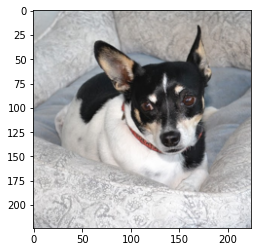

In [680]:
img = io.imread("data/sola.png")
plt.imshow(img)
plt.show()

whereas skimage returns colors as fractions:

In [681]:
# The first 5 pixels in the first row
img[0,0:5]

array([[189, 197, 200],
       [188, 196, 199],
       [187, 197, 199],
       [188, 197, 200],
       [188, 198, 200]], dtype=uint8)

plt.imshow is smart enough to render the image either with fractions or fractions of 255. From the docs, the first argument, X, can be:
    
> (M, N, 3): an image with RGB values (0-1 float or 0-255 int).

## Utility function to show an image

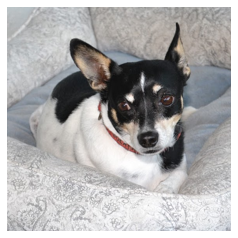

In [682]:
# Adapted from https://stackoverflow.com/a/53816322/156835

def show_image(image, cmap_type="viridis", title=""):
    dpi = mpl.rcParams["figure.dpi"]
    if len(image.shape) == 3:
        height, width, depth = image.shape
    else:
        height, width = image.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis("off")

    ax.set_title(title)

    # Display the image.
    ax.imshow(image, cmap=cmap_type)
    plt.show()
    
show_image(img)

## Converting to grayscale

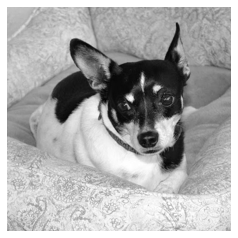

In [683]:
grayscale = color.rgb2gray(img)
show_image(grayscale, "gray")

## Viewing color channels

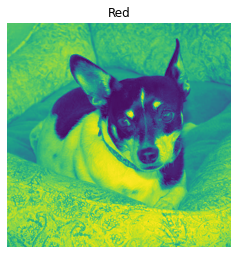

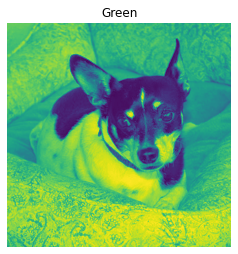

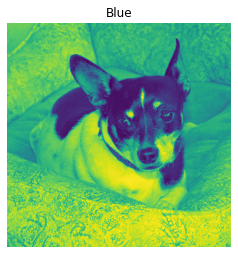

In [684]:
# It's hard to see the differences in these because the colors are similar
show_image(img[:, :, 0], title="Red")
show_image(img[:, :, 1], title="Green")
show_image(img[:, :, 2], title="Blue")

# Viewing red only

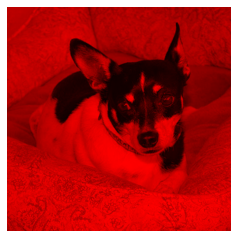

In [738]:
img_red = img.copy()
img_red[:, :, 1] = 0
img_red[:, :, 2] = 0
show_image(img_red)

## Flipping

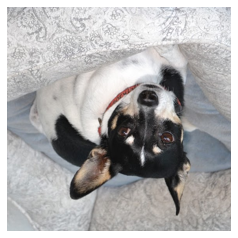

In [685]:
# flipud: "Flip array in the up/down direction. Flip the entries in each column in the up/down direction. 
# Rows are preserved, but appear in a different order than before."
# ud / upside down
show_image(np.flipud(img))

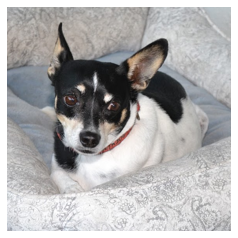

In [686]:
# lr / left-right
show_image(np.fliplr(img))

## Histogram

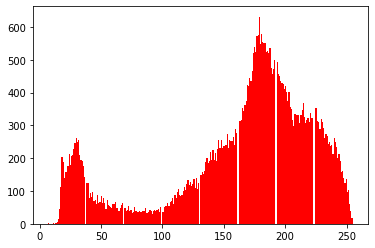

In [687]:
# ravel will return a continuous flattened array of the red values (vs a 224x224 array)
red = img[:,:,0].ravel()
# 256 because there are that many values from 0 to 255
plt.hist(red, bins=256, color="red")
plt.show()

## Thresholding

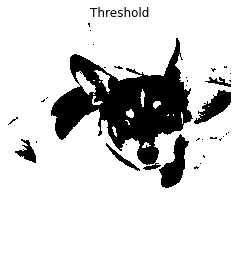

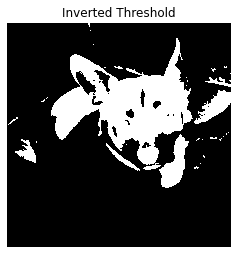

In [688]:
thresh = 127 / 255
greater = grayscale > thresh
show_image(greater, "gray", "Threshold")

inverted_threshold = grayscale < thresh
show_image(inverted_threshold, "gray", "Inverted Threshold")

### Determining a global threshold

Global threshold: 0.47 aka 120


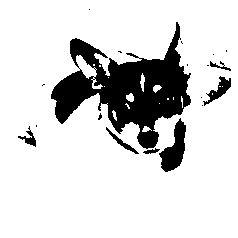

In [689]:
from skimage.filters import threshold_otsu

# "In computer vision and image processing, Otsu's method, named after 
# Nobuyuki Otsu (大津展之, Ōtsu Nobuyuki), is used to perform automatic image thresholding."

global_thresh = threshold_otsu(grayscale)
print("Global threshold: {:.2f} aka {:.0f}".format(global_thresh, global_thresh * 255))

binary = grayscale > global_thresh
show_image(binary, "gray")

### Using local thresholds

Local thresholds for first 5 pixels:
 [181.90660694 181.89024322 181.85778246 181.80977537 181.74689694]


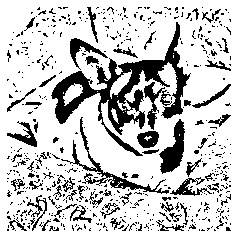

In [690]:
from skimage.filters import threshold_local

grayscale_255 = grayscale * 255

# Not clear why this returns a 0-255 value but threshold_otsu returns a 0-1 value
local_thresh = threshold_local(grayscale_255, block_size=35, offset=10)
print("Local thresholds for first 5 pixels:\n", local_thresh[0, 0:5])
binary_local = grayscale_255 > local_thresh

show_image(binary_local, "gray")

### All thresholds

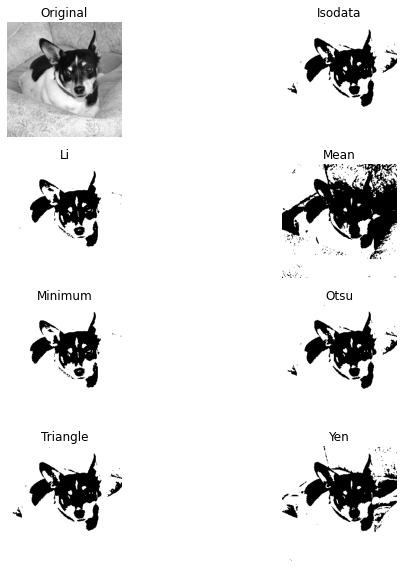

In [691]:
from skimage.filters import try_all_threshold

fig, ax = try_all_threshold(grayscale, verbose=False, figsize=(10, 8))
plt.show()

## Filtering

### Sobel

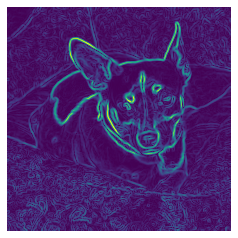

In [692]:
show_image(skimage.filters.sobel(grayscale))

## Canny

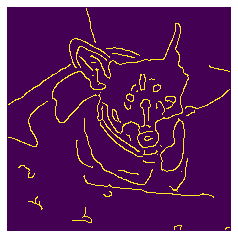

In [693]:
# Higher the sigma, the fewer edges it detects
show_image(skimage.feature.canny(grayscale, sigma=2))

## Gaussian

Gaussian reduces the sharpness of an iamge

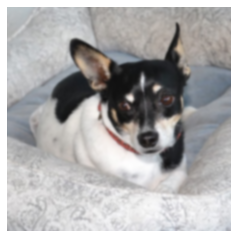

In [694]:
show_image(skimage.filters.gaussian(img, multichannel=True))

## Histogram equalization

Histogram equalization is a method in image processing of contrast adjustment using the image's histogram.

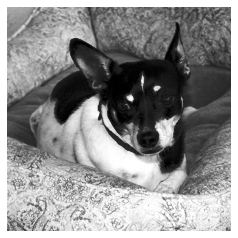

In [695]:
show_image(skimage.exposure.equalize_hist(grayscale), "gray")

## Adaptive Histogram

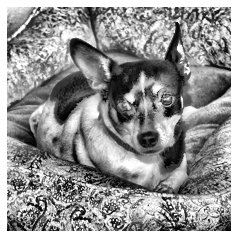

In [696]:
show_image(skimage.exposure.equalize_adapthist(grayscale, clip_limit=0.03), "gray")

# Transforming

## Rotating

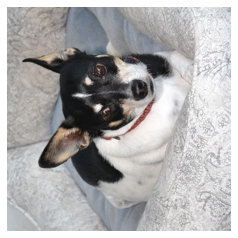

In [697]:
# Positive numbers rotate to the left
rotated = skimage.transform.rotate(img, 90)
show_image(rotated)

## Scaling

### Using rescale

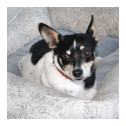

In [698]:
rescaled = skimage.transform.rescale(img, 0.5, anti_aliasing=True, multichannel=True)
show_image(rescaled)

### Using resize

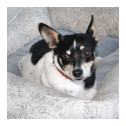

In [699]:
new_height = int(img.shape[0] / 2)
new_width = int(img.shape[1] / 2)
resized = skimage.transform.resize(img, (new_height, new_width), anti_aliasing=True)
show_image(resized)

## Resizing

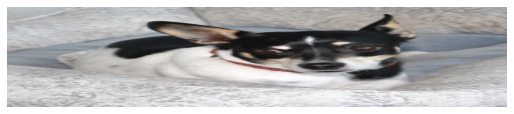

In [700]:
resized = skimage.transform.resize(img, (100, 500), anti_aliasing=True)
show_image(resized)

## Erosion and dilation

Erosion is good for removing minor white noise.

Dilation expands the image.

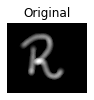

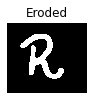

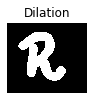

In [701]:
letter_r = rgb2gray(plt.imread("data/letter_r.png"))
show_image(letter_r, "gray", title="Original")

eroded = morphology.binary_erosion(letter_r)
show_image(eroded, "gray", "Eroded")

dilated = morphology.binary_dilation(letter_r)
show_image(dilated, "gray", "Dilation")

## Adding noise to an image

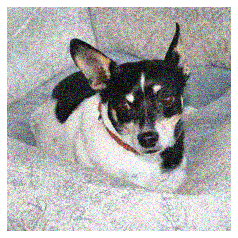

In [702]:
from skimage.util import random_noise

noisy_image = random_noise(img)
show_image(noisy_image)

## Removing noise from an image

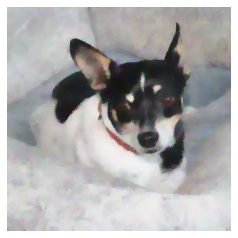

In [703]:
from skimage.restoration import denoise_tv_chambolle

denoised_image = denoise_tv_chambolle(noisy_image, weight=0.1, multichannel=True)
show_image(denoised_image)

## Grouping into superpixels

Sample:

 [[ 1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2]
 [21 21  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2]
 [21 21 21 21 21 21 21 21 21 21 21 21 25 25 25 25 25 25 25 25]
 [21 21 21 21 21 21 21 21 21 21 21 21 25 25 25 25 25 25 25 25]
 [21 21 21 21 21 21 21 21 21 21 21 21 25 25 2

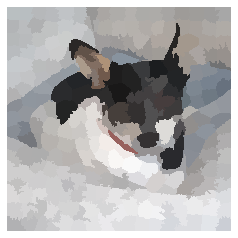

In [704]:
from skimage.segmentation import slic
from skimage.color import label2rgb

# slic: "Simple Linear Iterative Clustering. Segments image using k-means clustering in Color-(x,y,z) space."
# n_segments is optional: "The (approximate) number of labels in the segmented output image."
# start_label is to prevent a deprecation warning.
segments = slic(img, n_segments=300, start_label=1)
# Each pixel in the original image gets assigned a number from 1 to a max o n_segments
print("Sample:\n\n", segments[0:20, 0:20])
print("\nActual unique segments:", np.unique(segments.ravel()).size)

# label2rgb: "Return an RGB image where color-coded labels are painted over the image."
# bg_label is to preven to prevent a deprecation warning
segmented_image = label2rgb(segments, img, kind='avg', bg_label=0)


show_image(segmented_image)

## Contours

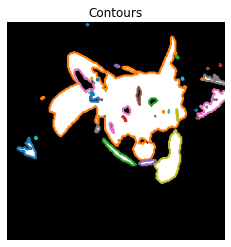

In [705]:
def show_image_contour(image, contours):
    plt.figure()
    for n, contour in enumerate(contours):
        plt.plot(contour[:, 1], contour[:, 0], linewidth=2)
    plt.imshow(image, interpolation="nearest", cmap="gray_r")
    plt.title("Contours")
    plt.axis("off")

binary = grayscale > threshold_otsu(grayscale)
contours = measure.find_contours(binary, 0.8)
show_image_contour(binary, contours)

## Corners

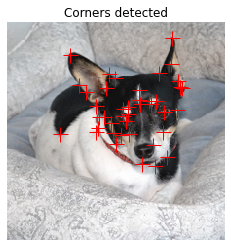

In [719]:
def show_image_with_corners(image, coords, title="Corners detected"):
    plt.imshow(image, interpolation="nearest", cmap="gray")
    plt.title(title)
    plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=15)
    plt.axis("off")

from skimage.feature import corner_harris, corner_peaks

# Apply the detector  to measure the possible corners
measure_image = corner_harris(grayscale)

# Find the peaks of the corners using the Harris detector
coords = corner_peaks(measure_image, min_distance=2, threshold_rel=0.04)

show_image_with_corners(img, coords)

## Face Detection

In [721]:
import matplotlib.patches as patches

def crop_face(result, detected, title="Face detected"):
    for d in detected:
        rostro= result[d['r']:d['r']+d['width'], d['c']:d['c']+d['height']]
    
        plt.figure(figsize=(8, 6))
        plt.imshow(rostro)    
        plt.title(title)
        plt.axis('off')
        plt.show()

def show_detected_face(result, detected, title="Face image"):
    plt.figure()
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap('gray')
    plt.title(title)
    plt.axis('off')

    for patch in detected:
        img_desc.add_patch(
            patches.Rectangle(
                (patch['c'], patch['r']),
                patch['width'],
                patch['height'],
                fill=False,
                color='r',
                linewidth=2)
        )
    plt.show()
    crop_face(result, detected)

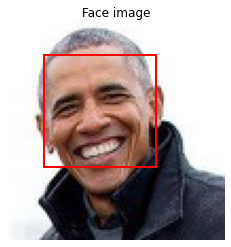

{'r': 15, 'c': 17, 'width': 53, 'height': 53}


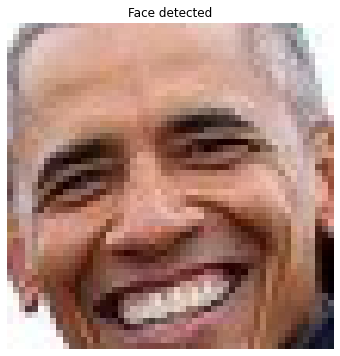

In [734]:
from skimage.feature import Cascade

mazur = plt.imread("data/obama.jpeg")
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with min and max size of searching window
detected = detector.detect_multi_scale(img=mazur,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10),
                                       max_size=(200, 200))

# Show the detected faces
show_detected_face(mazur, detected)